<a href="https://colab.research.google.com/github/sekiguchikeita/pandas_pra1/blob/master/pra1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

# import csv data
/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv

In [ ]:
PATH = "/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"

#Task1: Merging 12 monthes of sales data into a single CSV file


In [ ]:
df = pd.read_csv(PATH + 'Sales_April_2019.csv')

files = [file for file in os.listdir('/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/')]

all_months_data = pd.DataFrame()

all_months_data

""


In [ ]:
for file in files:
    df = pd.read_csv("/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
934245,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
934246,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
934247,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
934248,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [ ]:
all_months_data.to_csv("/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data_csv", index=False)

In [ ]:
all_data = pd.read_csv('/content/drive/My Drive/LAB9th/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data_csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


# Drop rows of NAN
NANが入っている行はデータとして扱えないので最初に消す必要がある

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]

#.dropnaで全てのNANを消す
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
1121095,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
1121096,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
1121097,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
1121098,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


# find 'or' and delete it
orが入ってるためデータ分析ができないため対処する必要がある

In [ ]:
#Orが入ってる行を探し出す
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
1119453,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1120093,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1120486,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1120586,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Orが入っていない'!='行を表示
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
1121095,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
1121096,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
1121097,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
1121098,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


# Convert columns to the correct type
データを処理する前にintやstrを揃える必要がある

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Task2 : add month columns

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6
...,...,...,...,...,...,...,...
1121095,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11
1121096,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11
1121097,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11
1121098,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11


# Task3: Add a sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


#Task4 : Add a city column
街で分類分けするときに必要な項目

In [ ]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


all_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA)


#Question 1:what was the best month for sales? How much was earned that month?

answer→Decenber

In [ ]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,65418,1.087061e+07,1.093354e+07
2,80694,1.313331e+07,1.321213e+07
3,102030,1.674725e+07,1.684260e+07
4,123348,2.020603e+07,2.034402e+07
5,112002,1.881075e+07,1.891564e+07
6,91518,1.537215e+07,1.546681e+07
7,96432,1.579524e+07,1.588665e+07
8,80688,1.338207e+07,1.346681e+07
9,78654,1.250995e+07,1.258536e+07


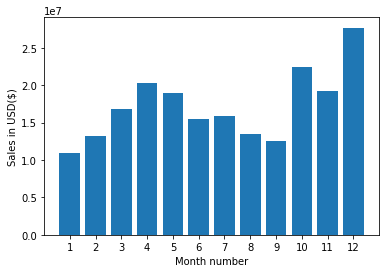

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

# Question2:what city had the higest number of sales
→San Francisco (CA)	

In [ ]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),99612,1.667945e+07,628764,1.677299e+07
Austin (TX),66918,1.085924e+07,418974,1.091749e+07
Boston (MA),135168,2.182446e+07,846672,2.196985e+07
Dallas (TX),100380,1.651577e+07,627720,1.660785e+07
Los Angeles (CA),199734,3.252861e+07,1249950,3.271542e+07
New York City (NY),167592,2.781222e+07,1054446,2.798590e+07
Portland (ME),16500,2.683136e+06,102864,2.698550e+06
Portland (OR),67818,1.116335e+07,423726,1.122439e+07
San Francisco (CA),301434,4.926877e+07,1893120,4.957322e+07


In [ ]:
#.sort_values()を使い数字を大きい順(降順)にする. 降順の場合は'ascending=False'が必要

sorted = results.sort_values('Sales', ascending=False)
sorted

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),301434,4.926877e+07,1893120,4.957322e+07
Los Angeles (CA),199734,3.252861e+07,1249950,3.271542e+07
New York City (NY),167592,2.781222e+07,1054446,2.798590e+07
Boston (MA),135168,2.182446e+07,846672,2.196985e+07
Atlanta (GA),99612,1.667945e+07,628764,1.677299e+07
Dallas (TX),100380,1.651577e+07,627720,1.660785e+07
Seattle (WA),99318,1.639978e+07,629646,1.648653e+07
Portland (OR),67818,1.116335e+07,423726,1.122439e+07
Austin (TX),66918,1.085924e+07,418974,1.091749e+07


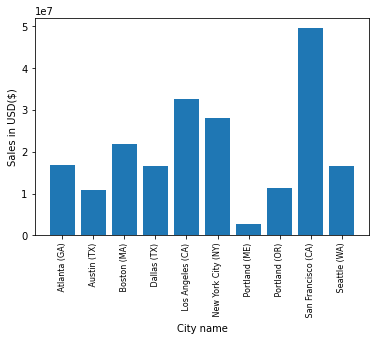

In [ ]:
#棒グラフの作成
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()

#Question3 : what time should we display advertisements to maximize likehood of customer's buying product?

answer→11~12, 19

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME)
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA)


In [41]:
#hourを抜き出せるようにorderdataの値をdt.hourに対応する形式にする
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
#.dt.hourその他.dt.yearなども可能
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.hour
all_data['Count'] = 1
all_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME),19,19,1
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA),10,10,1
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA),20,20,1
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA),10,10,1
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA),18,18,1


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,23460,23460,23460,23460,23460,23460,23460,23460,23460,23460,23460
1,14100,14100,14100,14100,14100,14100,14100,14100,14100,14100,14100
2,7458,7458,7458,7458,7458,7458,7458,7458,7458,7458,7458
3,4986,4986,4986,4986,4986,4986,4986,4986,4986,4986,4986
4,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124,5124
5,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926
6,14892,14892,14892,14892,14892,14892,14892,14892,14892,14892,14892
7,24066,24066,24066,24066,24066,24066,24066,24066,24066,24066,24066
8,37536,37536,37536,37536,37536,37536,37536,37536,37536,37536,37536


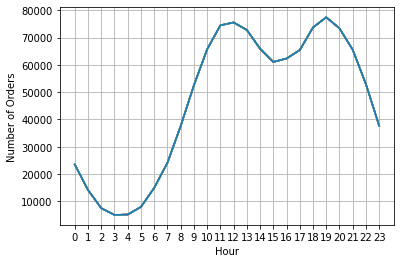

In [89]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

all_data.groupby(['Hour']).count()

#Question4 : what products are most often sold together?

保留

In [90]:
#.duplicatedで被ている値を抜き出す
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

#duplicatedが発動されていない

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME),19,19,1
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA),10,10,1
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA),20,20,1
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA),10,10,1
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA),18,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1121095,295660,AAA Batteries (4-pack),2,2.99,2019-11-04 14:17:00,"574 4th St, Los Angeles, CA 90001",11,5.98,Los Angeles (CA),14,14,1
1121096,295661,USB-C Charging Cable,1,11.95,2019-11-23 07:22:00,"359 1st St, Austin, TX 73301",11,11.95,Austin (TX),7,7,1
1121097,295662,Lightning Charging Cable,1,14.95,2019-11-13 16:12:00,"900 10th St, Boston, MA 02215",11,14.95,Boston (MA),16,16,1
1121098,295663,AAA Batteries (4-pack),1,2.99,2019-11-17 17:08:00,"592 Sunset St, Boston, MA 02215",11,2.99,Boston (MA),17,17,1


In [74]:
#.duplicatedで被ている値を抜き出す

df = all_data[all_data['Order ID'].duplicated(keep=False)]

#重なっているorderidのproductをgroupedに挿入する
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head(30)

,Order ID,Grouped
0,209921,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
1,209922,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
2,209923,"ThinkPad Laptop,ThinkPad Laptop,ThinkPad Lapto..."
3,209924,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,209925,"Bose SoundSport Headphones,Bose SoundSport Hea..."
5,209926,"Apple Airpods Headphones,Apple Airpods Headpho..."
6,209927,"Lightning Charging Cable,Lightning Charging Ca..."
7,209928,"Apple Airpods Headphones,Apple Airpods Headpho..."
8,209929,"Wired Headphones,Wired Headphones,Wired Headph..."
9,209930,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."


#Question 5: what poduct sold the most? why do you think it sold the most?

answer →　AAA Batteries (4-pack)	
reason → 金額と販売数には相関関係がある。priceが安い場合orderの個数は多くなり、priceが高いorderは少なくなる。

In [92]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland (ME),19,19,1
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco (CA),10,10,1
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles (CA),20,20,1
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle (WA),10,10,1
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco (CA),18,18,1


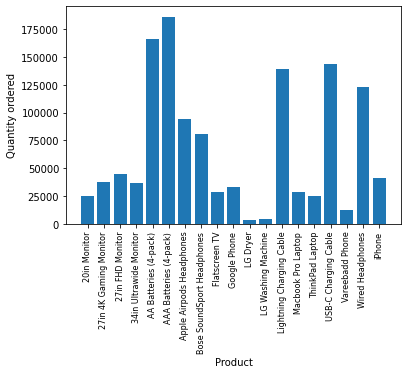

In [102]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity ordered')
plt.xlabel('Product')
plt.show()


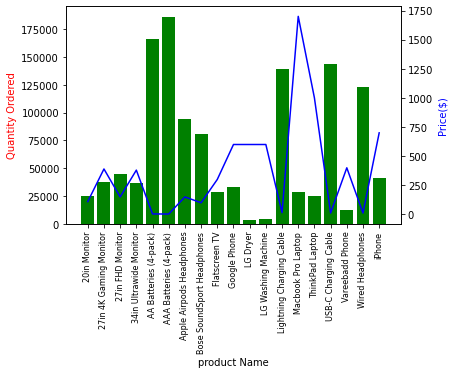

In [119]:
#金額と販売個数に相関関係があるかも？

prices = all_data.groupby('Product').mean()['Price Each']

#2つのグラフを組み合わせるテンプレあり
flg, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()